Lo primero que haremos es importar las librerias necesarias para el trabajo:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A continuación leemos los datos de entrenamiento y de prueba de MNIST y los ingresamos en frames para el procesamiento de los datos

In [2]:
mnist_train = pd.read_csv("MNIST_data/mnist_train.csv")
mnist_test = pd.read_csv("MNIST_data/mnist_test.csv")

Usamos el método head para ver la estructura de los datos, con sus etiquetas

In [3]:
mnist_train.head(3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_test.head(3)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos observar que la columna a categorizar es la primer columna que tiene por titulo "5" en el dataset de entramiento y "7" en el de prueba, el resto de columnas son los pixeles del dígito.

Ahora procedemos a dividir el dataset de entramiento y de prueba en datasets con los valores de los pixeles y otros con las categorias.

In [5]:
mnist_train_pixels = mnist_train.drop("5", axis=1) # pixeles del digito MNIST del dataset de entrenamiento
mnist_train_labels = mnist_train.iloc[:,0] # variable categorica del dataset de entrenamiento
mnist_test_pixels = mnist_test.drop("7", axis=1) # pixeles del digito MNIST del dataset de prueba
mnist_test_labels = mnist_test.iloc[:,0] # variable categorica del dataset de entrenamiento

procedemos a mirar el shape de los dataset de entrenamiento para darnos una idea de cuántos columnas y filas tiene cada uno y usamos el método head para ver como quedaron conformados los datasets

In [6]:
mnist_train_pixels.shape

(59999, 784)

In [7]:
mnist_train_pixels.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_train_labels.shape

(59999,)

In [9]:
mnist_train_labels.head(3)

0    0
1    4
2    1
Name: 5, dtype: int64

Ahora, para darnos una idea de los valores del dataset de entrenamiento procedemos a obtener la información descriptiva de éste.



In [10]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0, 
 maximo: 255, 
 media: 33.31839161605075, 
 mediana: 0.0, 
 valor mas comun: 0


Podemos observar que en el dataset encontramos valores entre 0 y 255 que son los colores de los pixeles que conforman el digito.

Para mejorar el rendimiento de nuestros clasificadores y ayudar a que los algoritmos iterativos de aprendizaje estadístico sean más rápidos para entrenar vamos a normalizar los valores del dataset, convirtiendo los valores en 0 para los pixeles blancos y 1 para los negros.

In [11]:
mnist_train_pixels = mnist_train_pixels / 255
mnist_test_pixels = mnist_test_pixels / 255

In [12]:
dataset_info = pd.Series(mnist_train_pixels.values.ravel())
print(" minimo: {}, \n maximo: {}, \n media: {}, \n mediana: {}, \n valor mas comun: {}"
      .format(dataset_info.min(), dataset_info.max(), 
              dataset_info.mean(), dataset_info.median(), 
              dataset_info.value_counts().idxmax()))

 minimo: 0.0, 
 maximo: 1.0, 
 media: 0.130660359271895, 
 mediana: 0.0, 
 valor mas comun: 0.0


Ahora procederemos a obtener la información del primer digito del dataset.

In [13]:
first_image_data = mnist_train_pixels.iloc[0]

Obtengamos su shape

In [14]:
first_image_data.shape

(784,)

Hay 784 valores, es decir, 784 pixeles que conforman cada digito de MNIST.

Vamos a proceder a convertir el vector de 784 datos en una matriz de 28x28, esto se ingresara en la variable first_image y procederemos a graficar cada dato de la matriz con el fin de ver el primer número, que según el primer elemento del dataset de categorías (mnist_train_labels) debería ser un 0, este número también se guardara en la variable first_label para poder titular la gráfica con el digito.

In [15]:
first_image = first_image_data.values.reshape(28,28)
first_label = mnist_train_labels[0]

Procedemos a mirar la matriz first_image y a verificar que si sea una matriz 28x28 con el atributo shape

In [16]:
first_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
first_image.shape

(28, 28)

comprobamos que la variable si contiene el primer valor en el arreglo de categorias y procedemos a dibujar el primer digito.

In [18]:
first_label

0

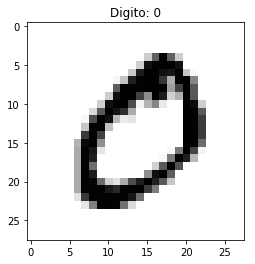

In [19]:
plt.imshow(first_image, cmap='gray_r')
plt.title('Digito: {}'.format(first_label))
plt.show()

Ahora, vamos a hacer un histograma con la variable que contiene los labels de los digitos del dataset para ver que tan distribuidos están los datos

(array([5923., 6742., 5958., 6131., 5842., 5420., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

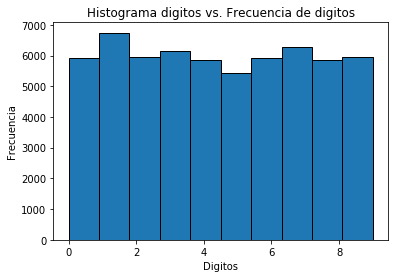

In [20]:
plt.title('Histograma digitos vs. Frecuencia de digitos')
plt.xlabel("Digitos")
plt.ylabel("Frecuencia")
plt.hist(mnist_train_labels, edgecolor = 'black')

Podemos observar que los datos están aproximadamente distribuidos de manera uniforme lo cual nos permite asegurar que el dataset tiene un buen balance de digitos para entrenar los modelos

# Regresión Logística Multinomial

Lo primero que haremos será importar la librería necesaria para entrenar el modelo

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Ahora instanciamos un objeto de la clase LogisticRegression de Sklearn enviando los siguientes parametros:

multi_class = "multinomial" para indicar que el problema que queremos resolver es multiclase.

Según la documentación de Sklearn, el parámetro solver, es usado para definir cuál es el algoritmo de optimización a usar en nuestro modelo, además, se menciona que "newton-cg", "sag", "saga" y "lbfgs" son algoritmos que funcionan bien para problemas multinomiales como es nuestro caso. Se descarta "liblinear" por ser un algoritmo que funciona bien para datasets pequeños, contrario al dataset de MNIST. [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html]

Vamos a entrenar cuatro modelos con cada uno de los algoritmos de optimización mencionados y compararemos los resultados de cada uno con el fin de ver cual es la mejor opción para nuestro dataset.

In [23]:
solver_algorithms = ["sag", "saga", "newton-cg", "lbfgs"]
model_accuracy = []
classification_reports = []

for algorithm in solver_algorithms:
    logistic_regression_model = LogisticRegression(solver=algorithm, multi_class='multinomial', max_iter=300)
    logistic_regression_model.fit(mnist_train_pixels, mnist_train_labels)
    predictions = logistic_regression_model.predict(mnist_test_pixels)
    model_accuracy.append(logistic_regression_model.score(mnist_test_pixels, mnist_test_labels))
    classification_reports.append(classification_report(mnist_test_labels, predictions))

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [33]:
for report, algorithm in zip(classification_reports, solver_algorithms):
    print("Reporte de clasificación para método de optimización: " + algorithm  + "\n" + report)

Reporte de clasificación para método de optimizacion: sag
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.90      0.92      0.91      1010
          4       0.94      0.94      0.94       982
          5       0.90      0.87      0.88       892
          6       0.94      0.95      0.95       958
          7       0.93      0.92      0.93      1027
          8       0.88      0.88      0.88       974
          9       0.91      0.92      0.91      1009

avg / total       0.93      0.93      0.93      9999

Reporte de clasificación para método de optimizacion: saga
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.90      0.91      1032
          3       0.90      0.9

In [35]:
for accuracy, algorithm in zip(model_accuracy, solver_algorithms):
    print("Precisión del modelo con el método de optimización " + algorithm + ": " + str(accuracy))

Precisión del modelo con el método de optimización sag: 0.9256925692569257
Precisión del modelo con el método de optimización saga: 0.9253925392539254
Precisión del modelo con el método de optimización newton-cg: 0.9255925592559255
Precisión del modelo con el método de optimización lbfgs: 0.9260926092609261


Se puede notar que la precisión de los cuatro modelos es similar (93%) siendo **lbfgs** el mejor método de optimización por muy poca diferencia. 